## ============= Adult Census Dataset ===============




### In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### We can notice above that the dataset has no Null Values, in form on N/A or 0 but it does have null in form of '?"

In [4]:
# Checking the counts of label categories
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

### Here we have some Null values in form of "?"

In [5]:
income_all = df['income'].value_counts(normalize = True)
income_all*100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

### Here we can see that 75.9% people have income below 50k and remaining have income above 50k,so the data here is skewed


In [6]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


# ** Visualization of Data**

### 1. Based on Sex/Gender

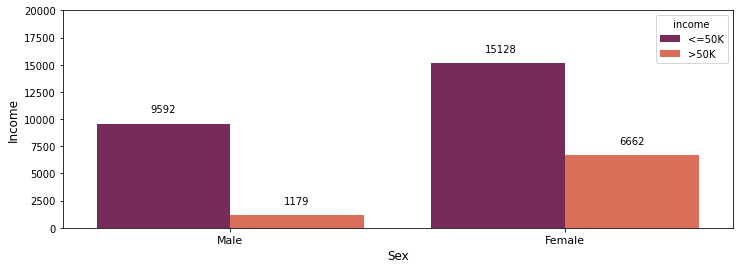

In [7]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'sex', hue="income", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Income", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

### There are more women than men in our dataset and, apparently, women have a higher income ratio compared to men.

### 2. Based on Education

/home/larissa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


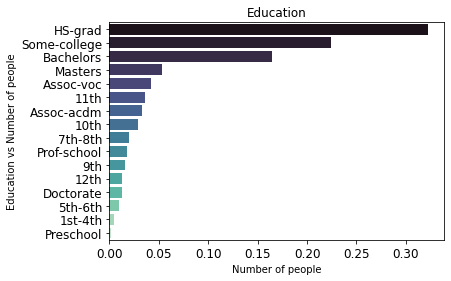

In [8]:
edu = df["education"].value_counts(normalize=True)

sns.barplot(edu.values, edu.index, palette='mako')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

## Here we see that the majority of people have completed HS-Grad, College or Bachelors

### 3.Based on Marital Status

In [9]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

/home/larissa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


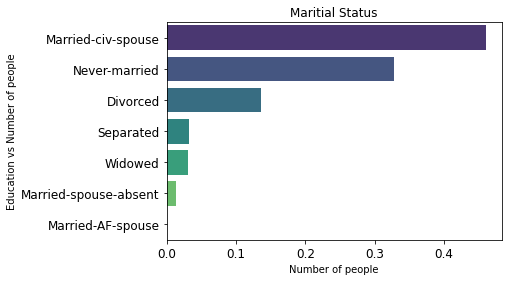

In [10]:
status = df["marital.status"].value_counts(normalize=True)

sns.barplot(status.values, status.index, palette='viridis')
plt.title('Maritial Status')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()


### 4. Based on Age

/home/larissa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


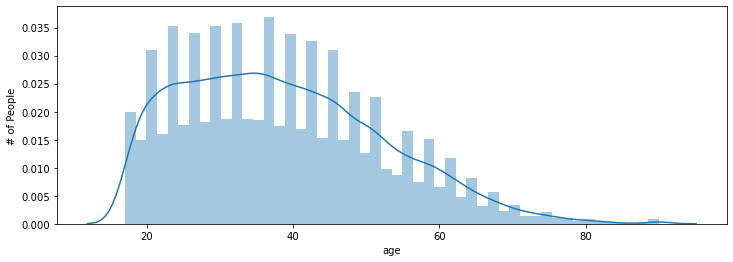

In [11]:
plt.figure(figsize=(12,4))

sns.distplot(df['age'])
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('# of People')
plt.show()

### The Average age is around 38-40 yrs

### 5. Based on Race

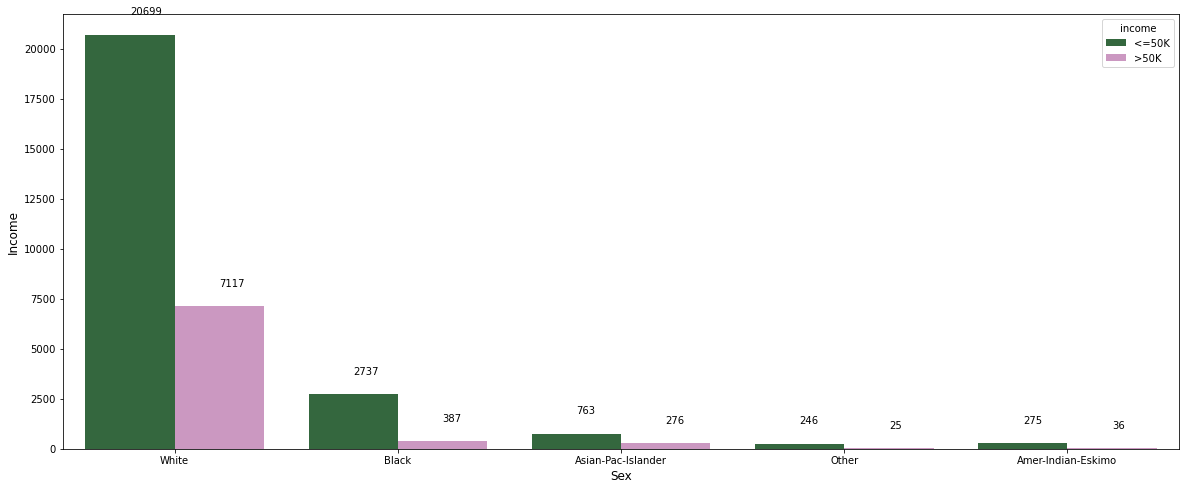

In [12]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'race', hue="income", palette = 'cubehelix')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Income", fontsize= 12)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

### 6. Income With Respect to Education

/home/larissa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


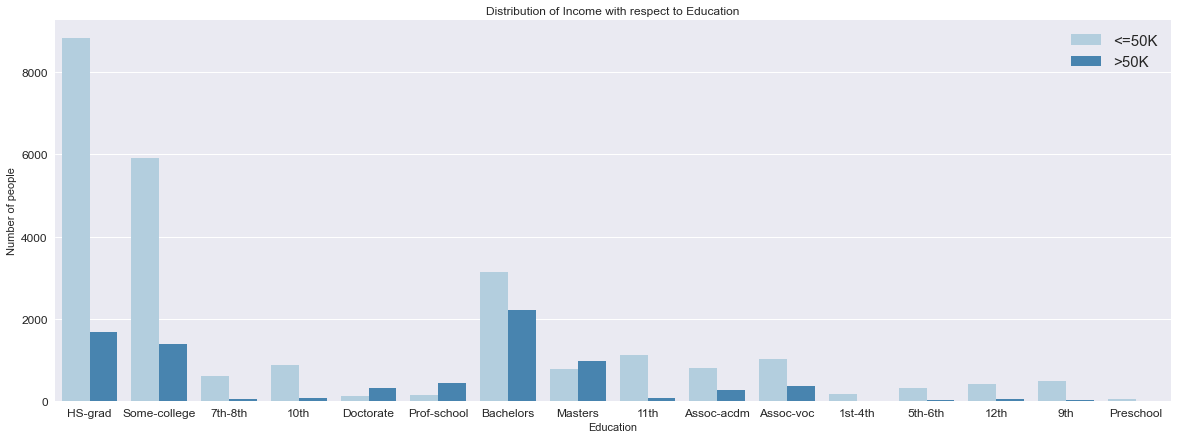

In [13]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['education'],
              hue=df['income'], palette='Blues')
plt.title('Distribution of Income with respect to Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### 8. Income with respect to Marital Status

/home/larissa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


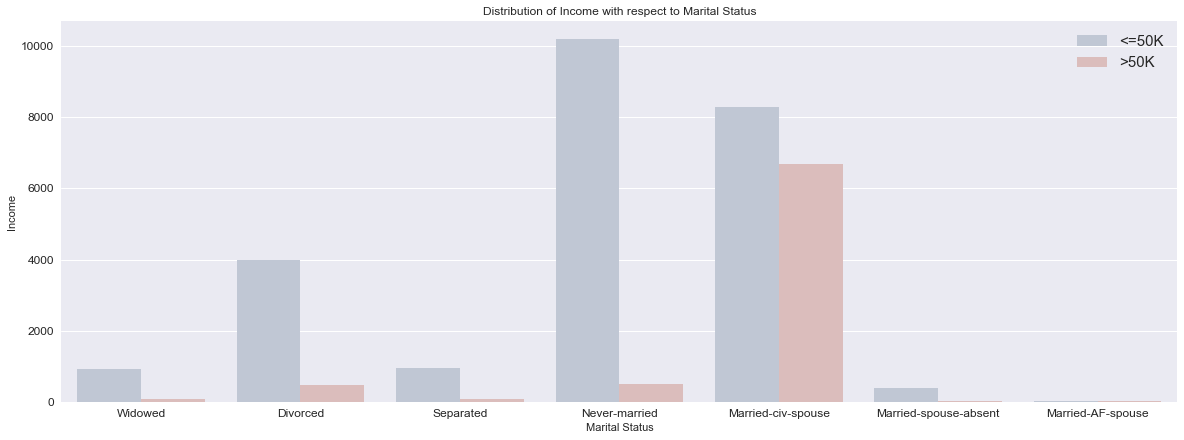

In [14]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['marital.status'],
              hue=df['income'], palette='vlag')
plt.title('Distribution of Income with respect to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### 9. Average Hours per Week

/home/larissa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


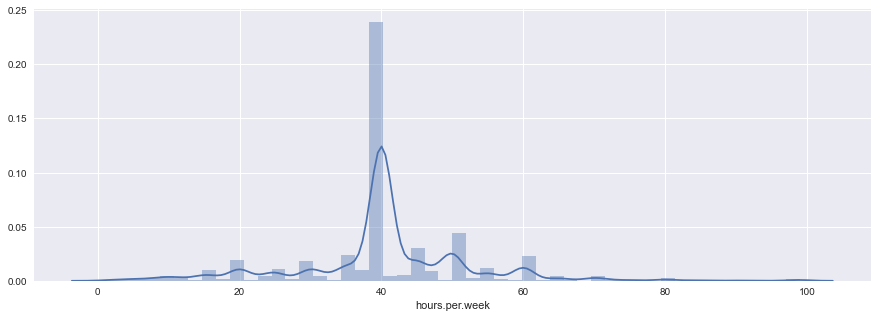

In [15]:
plt.figure(figsize=(15,5))

sns.distplot(df['hours.per.week'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [16]:
df["hours.per.week"].mean()

40.437455852092995

#### Seems that the average Hours per week put by an individual is 40

### 10. Occupation

/home/larissa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


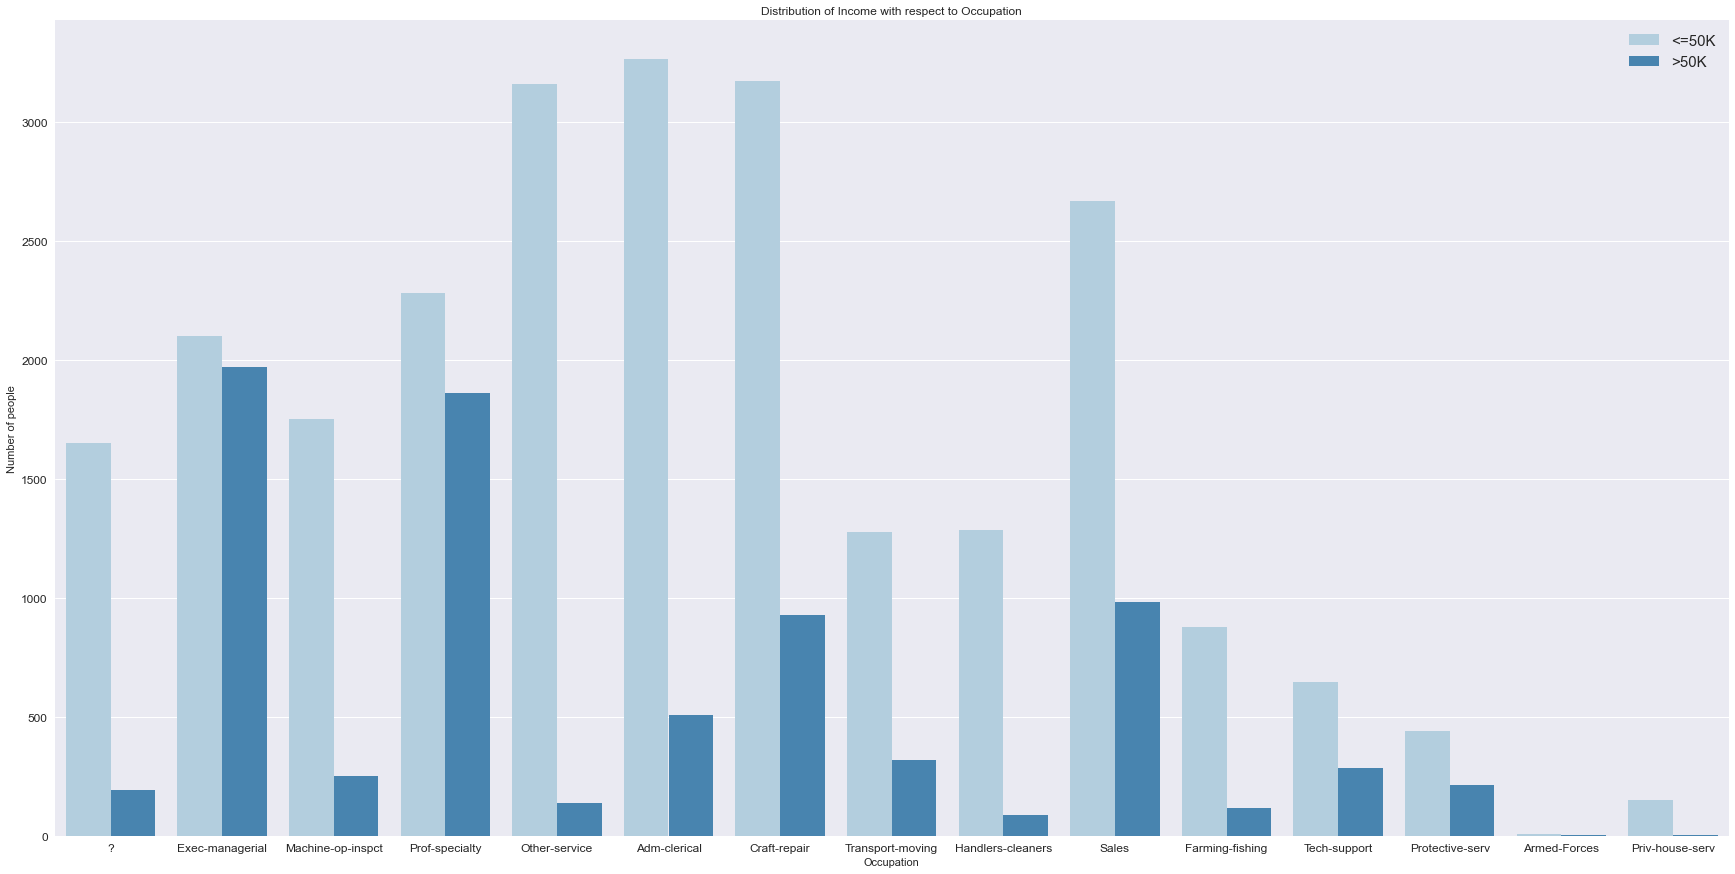

In [17]:
plt.style.use('seaborn')
plt.figure(figsize=(30, 15))
sns.countplot(df['occupation'],
              hue=df['income'], palette='Blues')
plt.title('Distribution of Income with respect to Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

 =======

In [18]:
df = df.replace('?', np.nan)

In [19]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [20]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [21]:
## Replacing the None values with mode 

df["workclass"] = df["workclass"].fillna(df["workclass"].mode())
df["occupation"] = df["occupation"].fillna(df["occupation"].mode())
df["native.country"] = df["native.country"].fillna(df["native.country"].mode())
df.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

In [23]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        
        df[col] = le.fit_transform(df[col].astype(str))

In [25]:
df.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.059065,-0.076646,-0.010508,0.036527,-0.266288,0.012493,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234037
workclass,0.059065,1.000000,-0.019063,-0.019395,-0.054317,0.042023,0.312403,0.012846,0.018877,0.002444,0.010702,-0.010918,-0.093419,0.001228,-0.055077
fnlwgt,-0.076646,-0.019063,1.000000,-0.028145,-0.043195,0.028153,-0.000483,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.062710,-0.009463
education,-0.010508,-0.019395,-0.028145,1.000000,0.359153,-0.038407,-0.046451,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.075186,0.079317
education.num,0.036527,-0.054317,-0.043195,0.359153,1.000000,-0.069304,0.044112,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.090277,0.335154
marital.status,-0.266288,0.042023,0.028153,-0.038407,-0.069304,1.000000,0.052769,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.020456,-0.199307
occupation,0.012493,0.312403,-0.000483,-0.046451,0.044112,0.052769,1.000000,-0.014616,-0.009980,0.026167,0.012356,0.004164,-0.056996,-0.000488,0.010822
relationship,-0.263698,0.012846,0.008931,-0.010876,-0.094153,0.185451,-0.014616,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010940,-0.250918
race,0.028718,0.018877,-0.021291,0.014131,0.031838,-0.068013,-0.009980,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.111296,0.071846
sex,0.088832,0.002444,0.026858,-0.027356,0.012280,-0.129314,0.026167,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.003013,0.215980


### Here is it quite visible that education,fnlwgt,native.country,race, etc have minimum to no relation with the final output income of Income hence we will be dropping these

In [26]:
X = df.drop(["fnlwgt","education","marital.status","relationship","native.country"],axis=1)
X

,age,workclass,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,3,9,9,4,0,0,4356,40,0
1,82,3,9,3,4,0,0,4356,18,0
2,66,8,10,14,2,0,0,4356,40,0
3,54,3,4,6,4,0,0,3900,40,0
4,41,3,10,9,4,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,3,10,10,4,1,0,0,40,0
32557,27,3,12,12,4,0,0,0,38,0
32558,40,3,9,6,4,1,0,0,40,1
32559,58,3,9,0,4,0,0,0,40,0


In [27]:
X = df.drop("income",axis=1)
y = df.income

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: income, dtype: float64

In [30]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [31]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [32]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

1    0.5
0    0.5
Name: income, dtype: float64

In [33]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,8,186061,15,10,6,14,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


# ====== Models ======

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=30)

In [36]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34608, 14)
X_test shape: (14832, 14)
y_train shape: (34608,)
y_test shape: (14832,)


In [37]:
lr = LogisticRegression()
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()


In [38]:
#LogisticRegression
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

#GaussianNB/ Naive Byers
gn.fit(X_train,y_train)
y_pred_gn = gn.predict(X_test)

#RandomForestClassifier
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#DecisionTreeClassifier
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#SVC
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#XGB
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/larissa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation of Models


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

In [40]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_lr) * 100,3))

Logistic Regression:
Accuracy score: 69.552
F1 Score:  67.022
MSE:  30.448


In [41]:
print("GaussianNB/ Naive Byers:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_gn) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_gn) * 100,3))

GaussianNB/ Naive Byers:
Accuracy score: 63.026
F1 Score:  45.81
MSE:  36.974


In [42]:
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

RandomForestClassifier:
Accuracy score: 92.031
F1 Score:  92.383
MSE:  7.969


In [43]:
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

DecisionTreeClassifier:
Accuracy score: 90.298
F1 Score:  90.817
MSE:  9.702


In [44]:
print("Support Vector Machine:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_svc) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_svc) * 100,3))

Support Vector Machine:
Accuracy score: 59.088
F1 Score:  32.11
MSE:  40.912


In [45]:
print("XGBoost Classifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_xgb) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_xgb) * 100,3))

XGBoost Classifier:
Accuracy score: 87.473
F1 Score:  87.952
MSE:  12.527


# Hyper - Tuning Parameters

### Decision Tree

In [46]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   15.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [47]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022679,0.000631,0.002323,0.000285,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49
1,0.021041,0.000433,0.002028,0.000061,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49
2,0.020596,0.000272,0.002083,0.000245,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49
3,0.020335,0.000303,0.001972,0.000066,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49
4,0.020073,0.000200,0.001978,0.000083,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.761052,0.762641,0.76004,0.759428,0.762173,0.761067,0.00122,49


In [48]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [49]:
grid_search.best_score_

0.8428396280288947

In [50]:
dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5)
dt_tuned.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [51]:
y_pred_dt_tuned = dt_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 85.309
F1 Score:  85.787
MSE:  14.691


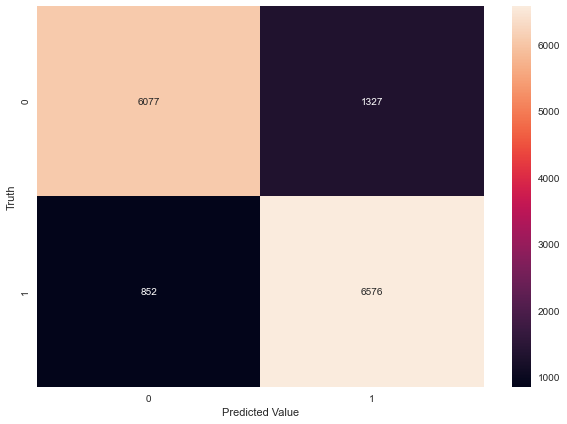

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

### Random Forest

In [61]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

rf_tuned = RandomForestClassifier(random_state=30)
                       
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=parameters, cv=5, random_state=30)


In [62]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=30)

In [63]:
rf_cv.best_params_

{'n_estimators': 142, 'max_depth': 95}

In [64]:
rf_cv.best_score_

0.9101363215796419

In [65]:
rf_tuned = RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)

In [66]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 92.199
F1 Score:  92.54
MSE:  7.801


In [67]:
score_rf = pd.DataFrame(rf_cv.cv_results_)
score_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.117966,0.024800,0.110310,0.001105,102,40,"{'n_estimators': 102, 'max_depth': 40}",0.912309,0.909419,0.910575,0.907672,0.908395,0.909674,0.001641,3
1,0.860972,0.030060,0.046385,0.002229,40,134,"{'n_estimators': 40, 'max_depth': 134}",0.908986,0.911731,0.910575,0.907239,0.908828,0.909472,0.001546,6
2,1.705397,0.038357,0.092515,0.005544,79,126,"{'n_estimators': 79, 'max_depth': 126}",0.908841,0.909419,0.911442,0.905794,0.909406,0.908981,0.001822,9
3,1.793358,0.008329,0.095884,0.001898,87,134,"{'n_estimators': 87, 'max_depth': 134}",0.910286,0.909275,0.912020,0.906372,0.907528,0.909096,0.001994,7
4,1.472854,0.004802,0.079598,0.001377,71,95,"{'n_estimators': 71, 'max_depth': 95}",0.909130,0.908264,0.911153,0.906372,0.907961,0.908576,0.001567,10


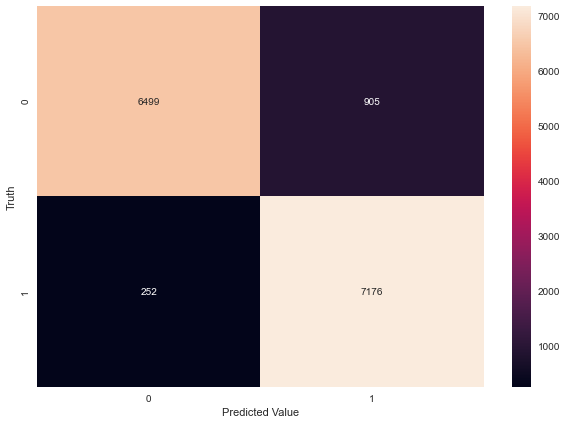

In [68]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

## Here we used multiple models like logistic regression, Naive Byers, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier and XGBoost classifier.


## The highest accuracy score of 92.199 and f1 score of 92.54 if from a Tuned Random Forest
